# P.I.L.L. Final Notebook Code (Group 11)

*The majority of this code came from class resources, the Dive Into Deep Learning textbook, and homework assignments. Other than that, we used code that we found in our literature review sources, which we have in the 'reference' section of our write up.*

In [ ]:
# These are necessary dependencies that we have collected from class and the D2L textbook

import os
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

import torchvision.transforms as transforms
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# We all saved the images and metadata table to our Google Drives, since it is a large
# amount of data and we knew that we would be using Google Colab to create this code

# This is us connecting to Drive so that we can access the images/metadata

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Reading in the Data

In [ ]:
# This is a path to the table that has image file names along with the actual names of the pills
# This is what we will use so that we have the accurate pill names for training and testing

file_path = '/content/drive/MyDrive/table.csv'
df = pd.read_csv(file_path)
df.head()


,ndc11,rxcui,name,rxnavImageObjectId,rxnavImageFileName,nlmImageFileName,RXNAV 120,RXBASE 120,RXNAV 300,RXBASE 300,RXNAV 600,RXBASE 600,RXNAV 800,RXBASE 800,RXNAV 1024,RXBASE 1024,RXNAV ORIGINAL,RXBASE ORIGINAL
0,00093-0311-01,978006,Loperamide Hydrochloride 2 MG Oral Capsule,185643662,00093-0311-01_RXNAVIMAGE10_26211358.jpg,00093-0311-01_NLMIMAGE10_6315B1FD.jpg,image/images/gallery/120/00093-0311-01_RXNAVIM...,image/images/gallery/120/00093-0311-01_NLMIMAG...,image/images/gallery/300/00093-0311-01_RXNAVIM...,image/images/gallery/300/00093-0311-01_NLMIMAG...,image/images/gallery/600/00093-0311-01_RXNAVIM...,image/images/gallery/600/00093-0311-01_NLMIMAG...,image/images/gallery/800/00093-0311-01_RXNAVIM...,image/images/gallery/800/00093-0311-01_NLMIMAG...,image/images/gallery/1024/00093-0311-01_RXNAVI...,image/images/gallery/1024/00093-0311-01_NLMIMA...,image/images/gallery/original/00093-0311-01_RX...,image/images/gallery/original/00093-0311-01_NL...
1,00093-3165-01,197985,Minocycline 50 MG Oral Capsule,185646490,00093-3165-01_RXNAVIMAGE10_36231B28.jpg,00093-3165-01_NLMIMAGE10_19270CA8.jpg,image/images/gallery/120/00093-3165-01_RXNAVIM...,image/images/gallery/120/00093-3165-01_NLMIMAG...,image/images/gallery/300/00093-3165-01_RXNAVIM...,image/images/gallery/300/00093-3165-01_NLMIMAG...,image/images/gallery/600/00093-3165-01_RXNAVIM...,image/images/gallery/600/00093-3165-01_NLMIMAG...,image/images/gallery/800/00093-3165-01_RXNAVIM...,image/images/gallery/800/00093-3165-01_NLMIMAG...,image/images/gallery/1024/00093-3165-01_RXNAVI...,image/images/gallery/1024/00093-3165-01_NLMIMA...,image/images/gallery/original/00093-3165-01_RX...,image/images/gallery/original/00093-3165-01_NL...
2,00093-0810-01,198045,Nortriptyline 10 MG Oral Capsule,185646437,00093-0810-01_RXNAVIMAGE10_24231228.jpg,00093-0810-01_NLMIMAGE10_34271A58.jpg,image/images/gallery/120/00093-0810-01_RXNAVIM...,image/images/gallery/120/00093-0810-01_NLMIMAG...,image/images/gallery/300/00093-0810-01_RXNAVIM...,image/images/gallery/300/00093-0810-01_NLMIMAG...,image/images/gallery/600/00093-0810-01_RXNAVIM...,image/images/gallery/600/00093-0810-01_NLMIMAG...,image/images/gallery/800/00093-0810-01_RXNAVIM...,image/images/gallery/800/00093-0810-01_NLMIMAG...,image/images/gallery/1024/00093-0810-01_RXNAVI...,image/images/gallery/1024/00093-0810-01_NLMIMA...,image/images/gallery/original/00093-0810-01_RX...,image/images/gallery/original/00093-0810-01_NL...
3,00093-0811-01,317136,Nortriptyline 25 MG Oral Capsule,185646420,00093-0811-01_RXNAVIMAGE10_20231018.jpg,00093-0811-01_NLMIMAGE10_15270A98.jpg,image/images/gallery/120/00093-0811-01_RXNAVIM...,image/images/gallery/120/00093-0811-01_NLMIMAG...,image/images/gallery/300/00093-0811-01_RXNAVIM...,image/images/gallery/300/00093-0811-01_NLMIMAG...,image/images/gallery/600/00093-0811-01_RXNAVIM...,image/images/gallery/600/00093-0811-01_NLMIMAG...,image/images/gallery/800/00093-0811-01_RXNAVIM...,image/images/gallery/800/00093-0811-01_NLMIMAG...,image/images/gallery/1024/00093-0811-01_RXNAVI...,image/images/gallery/1024/00093-0811-01_NLMIMA...,image/images/gallery/original/00093-0811-01_RX...,image/images/gallery/original/00093-0811-01_NL...
4,00093-0812-01,198046,Nortriptyline 50 MG Oral Capsule,185646464,00093-0812-01_RXNAVIMAGE10_2D2316D8.jpg,00093-0812-01_NLMIMAGE10_DD0E6EE3.jpg,image/images/gallery/120/00093-0812-01_RXNAVIM...,image/images/gallery/120/00093-0812-01_NLMIMAG...,image/images/gallery/300/00093-0812-01_RXNAVIM...,image/images/gallery/300/00093-0812-01_NLMIMAG...,image/images/gallery/600/00093-0812-01_RXNAVIM...,image/images/gallery/600/00093-0812-01_NLMIMAG...,image/images/gallery/800/00093-0812-01_RXNAVIM...,image/images/gallery/800/00093-0812-01_NLMIMAG...,image/images/gallery/1024/00093-0812-01_RXNAVI...,image/images/gallery/1024/00093-0812-01_NLMIMA...,image/images/gallery/original/00093-0812-01_RX...,image/images/gallery/original/00093-0812-01_NL...


In [ ]:
# Import dependencies again

import pandas as pd
import os

# Accessing specifically the NLM images since these are only of the pill and do not have
# any words in the background of the picture (the rxnav images have that)

df = df[['name', 'nlmImageFileName']]
image_dir = "/content/drive/MyDrive/300"

df['full_path'] = df['nlmImageFileName'].apply(
    lambda x: os.path.join(image_dir, os.path.basename(str(x)))
)

df['exists'] = df['full_path'].apply(os.path.exists)

# Reporting results to make sure the dataframe exists and loaded all of the images

total = len(df)
found = df['exists'].sum()
missing = total - found

# Printing to make sure we did not lose any images in this process

print(f"Found {found} out of {total} images.")
print(f"Missing {missing} images")

# If we miss any images we want to know which ones they are

print("\nMissing files (first 10):")
print(df.loc[~df['exists'], 'nlmImageFileName'].head(10))

# Keep only the rows with existing images

df_clean = df[df['exists']].reset_index(drop=True)

# Save to CSV for later

df_clean.to_csv("nlm_images_verified.csv", index=False)
print("\n Saved verified file list to 'nlm_images_verified.csv'")

Found 4392 out of 4392 images.
Missing 0 images

Missing files (first 10):
Series([], Name: nlmImageFileName, dtype: object)

 Saved verified file list to 'nlm_images_verified.csv'


*From the output above, we know that we were able to upload all 4,392 images, which is great.*

In [ ]:
# Read in final image csv

pd.read_csv("nlm_images_verified.csv")

,name,nlmImageFileName,full_path,exists
0,Loperamide Hydrochloride 2 MG Oral Capsule,00093-0311-01_NLMIMAGE10_6315B1FD.jpg,/content/drive/MyDrive/600/00093-0311-01_NLMIM...,True
1,Minocycline 50 MG Oral Capsule,00093-3165-01_NLMIMAGE10_19270CA8.jpg,/content/drive/MyDrive/600/00093-3165-01_NLMIM...,True
2,Nortriptyline 10 MG Oral Capsule,00093-0810-01_NLMIMAGE10_34271A58.jpg,/content/drive/MyDrive/600/00093-0810-01_NLMIM...,True
3,Nortriptyline 25 MG Oral Capsule,00093-0811-01_NLMIMAGE10_15270A98.jpg,/content/drive/MyDrive/600/00093-0811-01_NLMIM...,True
4,Nortriptyline 50 MG Oral Capsule,00093-0812-01_NLMIMAGE10_DD0E6EE3.jpg,/content/drive/MyDrive/600/00093-0812-01_NLMIM...,True
...,...,...,...,...
4387,Enalapril Maleate 2.5 MG Oral Tablet,16714-0442-01_NLMIMAGE10_DC4D6E2B.jpg,/content/drive/MyDrive/600/16714-0442-01_NLMIM...,True
4388,quinapril 5 MG Oral Tablet,31722-0267-90_NLMIMAGE10_EA507553.jpg,/content/drive/MyDrive/600/31722-0267-90_NLMIM...,True
4389,trospium chloride 20 MG Oral Tablet,00574-0145-60_NLMIMAGE10_3C519E2C.jpg,/content/drive/MyDrive/600/00574-0145-60_NLMIM...,True
4390,metaxalone 400 MG Oral Tablet,64720-0126-10_NLMIMAGE10_C6506353.jpg,/content/drive/MyDrive/600/64720-0126-10_NLMIM...,True


**Label encoding**

In [ ]:
# Import dependencies (again)

# we are using this specifically because we want to convert the pill names into
# numeric ids, which are easier to work with

# We sorted the numeric ids and counted them to see the number of unique classes (pills)
# we have images of

from sklearn.preprocessing import LabelEncoder
df_nlm = pd.read_csv("nlm_images_verified.csv")
df_nlm["pill_id"] = df_nlm["nlmImageFileName"].str.split("_").str[0]
le = LabelEncoder()
df_nlm = df_nlm.rename(columns={'name': 'label'})
df_nlm['label_id'] = le.fit_transform(df_nlm['label'])
num_classes = len(le.classes_)
print("Classes:", num_classes)


Classes: 2112


*We have 2112 classes*

**Dataset class**

In [ ]:
class PillDataset(Dataset):

    def __init__(self, df, transform):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # Our images need to be in RGB to work!
        img = Image.open(row['full_path']).convert('RGB')
        img = self.transform(img)
        label = int(row['label_id'])
        return img, label

**Transforms**

In [ ]:
# The numbers in .Normalize() are the standard to use for ImageNet since we are feeding them
# to ResNet

# We are transforming the data to make it standard
# and then packing the images into a tensor so that the network
# processes them without an issue


# train_tfms is to transform the data and helps the model with generalization

# We rotated, flipped, and jittered as forms of data augmentation

train_tfms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(
        brightness=0.1, contrast=0.1,
        saturation=0.1, hue=0.05),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# test_tfms deals with the test data and
# does not include the rotation or flip transformations
# because we want the model to deal with the actual image without any artificial
# changes

test_tfms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])



In [ ]:
# This is us creating the full, transformed dataset read for us to split into test/train
# and perform training

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# Get unique pill IDs

pill_ids = df_nlm["pill_id"].unique()

# We split into a 70/30 for train and test with random seed of 42

train_ids, temp_ids = train_test_split(
    pill_ids, test_size=0.30, random_state=42, shuffle=True
)

# Now we split the test into 50/50
# All together, this gives us a 70/15/15 split for training/test/val

val_ids, test_ids = train_test_split(
    temp_ids, test_size=0.50, random_state=42, shuffle=True
)

# This helps us to ensure that we split at the pill level
# This is critical so each pill identity/id is assigned to only one split

train_df = df_nlm[df_nlm["pill_id"].isin(train_ids)]
val_df   = df_nlm[df_nlm["pill_id"].isin(val_ids)]
test_df  = df_nlm[df_nlm["pill_id"].isin(test_ids)]

# Applying the transformations that we specified above

train_dataset = PillDataset(train_df, transform=train_tfms)
val_dataset   = PillDataset(val_df,   transform=test_tfms)
test_dataset  = PillDataset(test_df,  transform=test_tfms)

# Using dataloader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Here are the number of unique pills in each train/test/val

print("Number of unique pills:")
print("Train:", train_df["pill_id"].nunique())
print("Val  :", val_df["pill_id"].nunique())
print("Test :", test_df["pill_id"].nunique())

# Number of images in each train/test/val

print("\nNumber of images:")
print("Train:", len(train_df))
print("Val  :", len(val_df))
print("Test :", len(test_df))

train_classes = train_df['label'].nunique()
val_classes   = val_df['label'].nunique()
test_classes  = test_df['label'].nunique()

print("Unique classes per split:")
print("Train:", train_classes)
print("Val  :", val_classes)
print("Test :", test_classes)

Number of unique pills:
Train: 2965
Val  : 635
Test : 636

Number of images:
Train: 3070
Val  : 657
Test : 665
Unique classes per split:
Train: 1709
Val  : 544
Test : 536


*Creating ResNet18 base before training*

In [ ]:
# Now we would like to create ResNet18

# Similar to what we did in class and on homework assignment 2,
# we are using 2 3x3 convolutions followed by BatchNorm2d and ReLU

# We also used a skip connection, just like the homework and textbook

# This is the basic way that resNet18 is implemented

class BasicBlock(nn.Module):

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
             self.shortcut = nn.Sequential(
                 nn.Conv2d(in_channels,out_channels, kernel_size=1, stride=stride, bias=False),
                 nn.BatchNorm2d(out_channels)
             )

# This is standard for our convolutions and including the identity skip connection

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out +=  self.shortcut(identity)
        out = self.relu(out)
        return out

In [ ]:
# import dependency again!


from torch import nn


# This class actually builds the ResNet18. We will use the BasicBlock class
# from above to perform convolutions + BatchNorm2d + ReLU


class ResNet18(nn.Module):
   def __init__(self, num_classes=18, return_features=False):
       super(ResNet18, self).__init__()
       self.return_features = return_features
       self.conv1 = nn.Sequential(
           nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
           nn.BatchNorm2d(64),
           nn.ReLU(inplace=True),
           nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
       )


       self.layer1 = self._make_layer(64, 64, 2, stride=1)
       self.layer2 = self._make_layer(64, 128, 2, stride=2)
       self.layer3 = self._make_layer(128, 256, 2, stride=2)
       self.layer4 = self._make_layer(256, 512, 2, stride=2)


       self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
       self.fc = nn.Linear(512, num_classes)


   def _make_layer(self, in_channels, out_channels, num_blocks, stride):
       blocks = []
       blocks.append(BasicBlock(in_channels, out_channels, stride))
       for _ in range(1, num_blocks):
           blocks.append(BasicBlock(out_channels, out_channels))
       return nn.Sequential(*blocks)


   def forward(self, x):
       x = self.conv1(x)
       x = self.layer1(x)
       x = self.layer2(x)
       x = self.layer3(x)
       x = self.layer4(x)


       if self.return_features:
           return x


       x = self.avgpool(x)
       x = torch.flatten(x, 1)
       x = self.fc(x)
       return x


# Actually creating the ResNet18 model and saving it to our devices
model = ResNet18(num_classes=num_classes, return_features=False)
model = model.to(device)


# This is so that we can figure out the loss!


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

**Training The From Scratch ResNet18**

In [ ]:
# Now we get to train the model!
# Again, most of this code comes from class and homework assignments
# When training we make sure to collect metrics on loss so that we are able to do error analysis and make training curves

def train_one_epoch(model, loader, optimizer):
   model.train()
   total_loss = 0
   correct = 0
   total = 0


   for imgs, labels in loader:
       imgs, labels = imgs.to(device), labels.to(device)

       optimizer.zero_grad()
       outputs = model(imgs)
       loss = criterion(outputs, labels)
       loss.backward()
       optimizer.step()

       total_loss += loss.item() * imgs.size(0)
       _, preds = outputs.max(1)
       correct += preds.eq(labels).sum().item()
       total += labels.size(0)


   return total_loss / total, correct / total


# Setting up so we can evaluate the model with the data we set aside

def evaluate(model, loader):
   model.eval()
   total_loss = 0
   correct = 0
   total = 0


   with torch.no_grad():
       for imgs, labels in loader:
           imgs, labels = imgs.to(device), labels.to(device)

           outputs = model(imgs)
           loss = criterion(outputs, labels)

           total_loss += loss.item() * imgs.size(0)
           _, preds = outputs.max(1)
           correct += preds.eq(labels).sum().item()
           total += labels.size(0)


   return total_loss / total, correct / total

In [ ]:
# We chose 10 epochs since this is just a baseline model. We will likely bump it to 20 or 30 epochs in our next milestone

# For the baseline, we just want to see the accuracy for top-1 (k=1)

epochs = 10


for epoch in range(1, epochs+1):
   train_loss, train_acc = train_one_epoch(model, train_loader, optimizer)
   val_loss, val_acc = evaluate(model, val_loader)


# Getting the loss and accuracy!


   print(f"Epoch {epoch:02d}:")
   print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
   print(f"  Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")
   print("-" * 20)


Epoch 01:
  Train Loss: 7.7942 | Train Acc: 0.0075
  Val   Loss: 7.9256 | Val   Acc: 0.0091
--------------------
Epoch 02:
  Train Loss: 7.3203 | Train Acc: 0.0140
  Val   Loss: 8.1535 | Val   Acc: 0.0137
--------------------
Epoch 03:
  Train Loss: 7.0336 | Train Acc: 0.0150
  Val   Loss: 8.4939 | Val   Acc: 0.0122
--------------------
Epoch 04:
  Train Loss: 6.7432 | Train Acc: 0.0169
  Val   Loss: 8.7674 | Val   Acc: 0.0137
--------------------
Epoch 05:
  Train Loss: 6.4788 | Train Acc: 0.0195
  Val   Loss: 8.8801 | Val   Acc: 0.0107
--------------------
Epoch 06:
  Train Loss: 6.2200 | Train Acc: 0.0205
  Val   Loss: 8.8192 | Val   Acc: 0.0198
--------------------
Epoch 07:
  Train Loss: 5.9978 | Train Acc: 0.0306
  Val   Loss: 9.0489 | Val   Acc: 0.0183
--------------------
Epoch 08:
  Train Loss: 5.7749 | Train Acc: 0.0322
  Val   Loss: 9.1557 | Val   Acc: 0.0122
--------------------
Epoch 09:
  Train Loss: 5.6129 | Train Acc: 0.0371
  Val   Loss: 9.2094 | Val   Acc: 0.0137
----

*The ResNet18 that we built from scratch did not work the way that we thought it would, with a final train accuracy of 0.0463 and val accuracy of 0.0274. We decided that we would try feature extraction with RNN to see if that performed better.*

**Feature Extraction ResNet18 + RNN**

**First is the Pretrained ResNet18 Model**

In [ ]:
# Importing even more dependencies!

import torchvision.models as models
import torch.nn as nn

# Since we are doing feature extraction, we do not use the ResNet18 that we built from scratch,
# we just use the .resnet18 function. We set the weights as "IMAGENET1K_V1" so
# it would be pretrained on ImageNet



model = models.resnet18(weights="IMAGENET1K_V1")

# We replaced the last layer with our own number of classes then saved the model

model.fc = nn.Linear(512, num_classes)
model = model.to(device)

# Finally, we optimized the parameters within the model

optimizer = optim.Adam(model.parameters(), lr=1e-4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 210MB/s]


In [ ]:
# We want to collect loses and accuracies so that we can assess the model metrics
# and create the training loss charts

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Chose to train for 10 epochs again! Will likely change to 20 or 30 in milestone 3.

epochs = 10

for epoch in range(1, epochs+1):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer)
    val_loss, val_acc = evaluate(model, val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Printing our training and val losses!

    print(f"Epoch {epoch:02d}:")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"  Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")
    print("-" * 20)

Epoch 01:
  Train Loss: 7.9118 | Train Acc: 0.0081
  Val   Loss: 7.9082 | Val   Acc: 0.0091
--------------------
Epoch 02:
  Train Loss: 7.1064 | Train Acc: 0.0186
  Val   Loss: 8.1437 | Val   Acc: 0.0107
--------------------
Epoch 03:
  Train Loss: 6.5595 | Train Acc: 0.0397
  Val   Loss: 8.1097 | Val   Acc: 0.0183
--------------------
Epoch 04:
  Train Loss: 6.0895 | Train Acc: 0.0619
  Val   Loss: 8.1680 | Val   Acc: 0.0289
--------------------
Epoch 05:
  Train Loss: 5.6734 | Train Acc: 0.0883
  Val   Loss: 8.1005 | Val   Acc: 0.0381
--------------------
Epoch 06:
  Train Loss: 5.2933 | Train Acc: 0.1212
  Val   Loss: 8.0664 | Val   Acc: 0.0472
--------------------
Epoch 07:
  Train Loss: 4.9369 | Train Acc: 0.1515
  Val   Loss: 8.0580 | Val   Acc: 0.0533
--------------------
Epoch 08:
  Train Loss: 4.6222 | Train Acc: 0.1847
  Val   Loss: 8.1679 | Val   Acc: 0.0502
--------------------
Epoch 09:
  Train Loss: 4.2938 | Train Acc: 0.2241
  Val   Loss: 8.1471 | Val   Acc: 0.0518
----

*This training and val loss and accuracy are SO much better!*

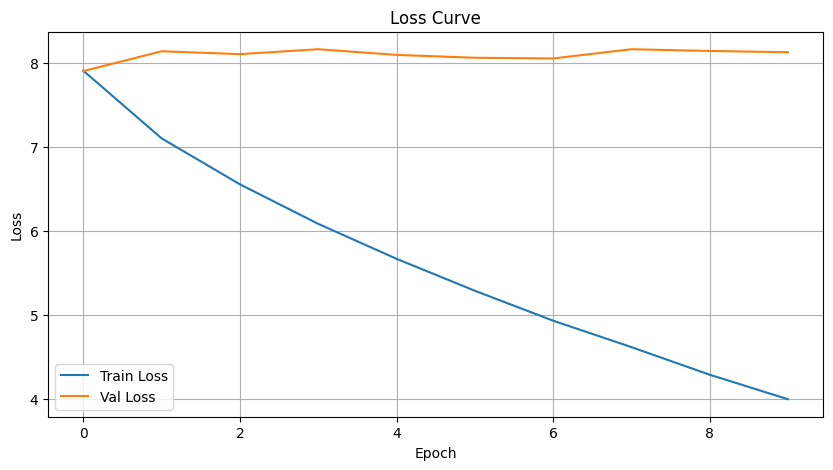

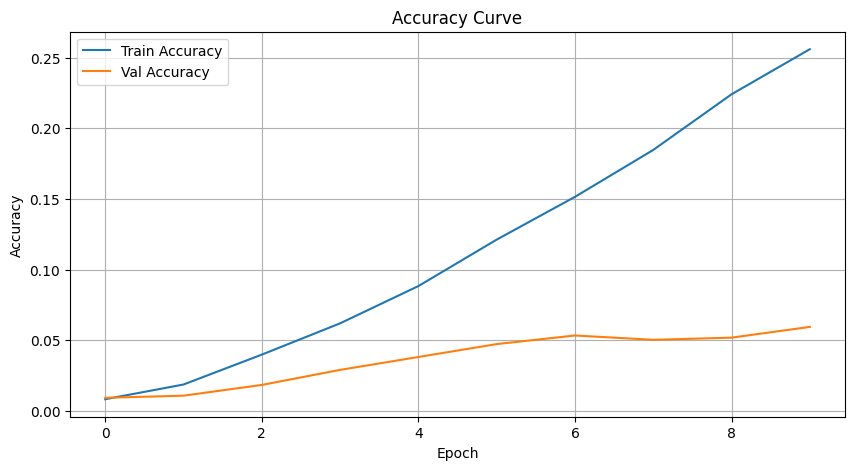

In [ ]:
# Making our training/val loss and accuracy curves!

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# This is our final test accuracy

test_loss, test_acc = evaluate(model, test_loader)
print("Final Test Accuracy:", test_acc)

Final Test Accuracy: 0.05714285714285714


In [ ]:
# This is how we evaluated the softmax classifier (Pretrained ResNet18 Model)
# We wanted to get the recall@1 and recall@5

# Essentially just grabbed the model and the test data and calculated if the top 5 labels
# were correct

def evaluate_softmax(model, test_loader):
    model.eval()
    total = 0
    recall1 = 0
    recall5 = 0

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)

            logits = model(imgs)
            top5 = torch.topk(logits, k=5, dim=1).indices

            recall1 += (top5[:, 0] == labels).sum().item()

            for i in range(len(labels)):
                if labels[i].item() in top5[i]:
                    recall5 += 1

            total += len(labels)

    return recall1 / total, recall5 / total

In [ ]:
# We are getting the softmax recall@1 and recall@5 and printing it out for the softmax classifier

soft_r1, soft_r5 = evaluate_softmax(model, test_loader)
print("Softmax Recall@1:", soft_r1)
print("Softmax Recall@5:", soft_r5)

Softmax Recall@1: 0.05714285714285714
Softmax Recall@5: 0.14887218045112782


In [ ]:
# Saving the model for the future

torch.save(model.state_dict(), "/content/drive/MyDrive/pill_resnet18.pth")
print("Model saved to Drive!")

Model saved to Drive!


In [ ]:
# We have to process the images like we did in our ResNet18 from scratch before
# we can extract the features

preprocess = transforms.Compose([
    transforms.Resize((300,300)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [ ]:
# Time to extract the model features!

# Converting them to RGB, processing them so they are in a tensor and normalized,
# and extracting the features

@torch.no_grad()
def extract_features(img_path):
    img = Image.open(img_path).convert("RGB")
    x = preprocess(img).unsqueeze(0).to(device)
    feats = feature_model(x).cpu().squeeze(0)
    return feats

# Running the model for the features then loading it as a dictionary

feature_model = models.resnet18(weights=None)
feature_model.fc = nn.Identity()
feature_model = feature_model.to(device)
feature_model.load_state_dict(model.state_dict(), strict=False)

# The output of this function is the 512-dim feature vector

feature_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# We saved the features to a dictionary to make them accessible

save_path = "/content/drive/MyDrive/pill_features.pt"
create_new_features_dict = True

if create_new_features_dict:
    features_dict = {}

    for idx, row in df_nlm.iterrows():
        label = row["label"]
        img_path = row["full_path"]

        print("Extracting:", label)
        features_dict[label] = extract_features(img_path)

    torch.save(features_dict, save_path)
    print("Saved new features to:", save_path)

else:
    features_dict = torch.load(save_path)
    print("Loaded feature dict with", len(features_dict), "entries.")

Extracting: Loperamide Hydrochloride 2 MG Oral Capsule
Extracting: Minocycline 50 MG Oral Capsule
Extracting: Nortriptyline 10 MG Oral Capsule
Extracting: Nortriptyline 25 MG Oral Capsule
Extracting: Nortriptyline 50 MG Oral Capsule
Extracting: Nortriptyline 75 MG Oral Capsule
Extracting: Hydroxyzine Pamoate 50 MG Oral Capsule
Extracting: Hydroxyzine Pamoate 25 MG Oral Capsule
Extracting: Hydrochlorothiazide 12.5 MG Oral Capsule
Extracting: doxycycline hyclate 50 MG Oral Capsule
Extracting: doxycycline hyclate 100 MG Oral Capsule
Extracting: doxycycline hyclate 100 MG Oral Capsule
Extracting: Fluoxetine 10 MG Oral Capsule
Extracting: Fluoxetine 20 MG Oral Capsule
Extracting: Fluoxetine 40 MG Oral Capsule
Extracting: Hydrochlorothiazide 25 MG / Triamterene 37.5 MG Oral Capsule
Extracting: Cephalexin 500 MG Oral Capsule
Extracting: nan
Extracting: Fluoxetine 40 MG Oral Capsule
Extracting: Indomethacin 25 MG Oral Capsule
Extracting: 24 HR Propranolol Hydrochloride 80 MG Extended Release O

Epoch 01 | Loss: 8.0143 | Accuracy: 0.0000
Epoch 02 | Loss: 7.7804 | Accuracy: 0.0000
Epoch 03 | Loss: 7.7619 | Accuracy: 0.0000
Epoch 04 | Loss: 7.7423 | Accuracy: 0.0000
Epoch 05 | Loss: 8.9085 | Accuracy: 0.0000
Epoch 06 | Loss: 7.7442 | Accuracy: 0.0000
Epoch 07 | Loss: 7.7371 | Accuracy: 0.0000
Epoch 08 | Loss: 7.7308 | Accuracy: 0.0000
Epoch 09 | Loss: 7.7251 | Accuracy: 0.0000
Epoch 10 | Loss: 7.7200 | Accuracy: 0.0000


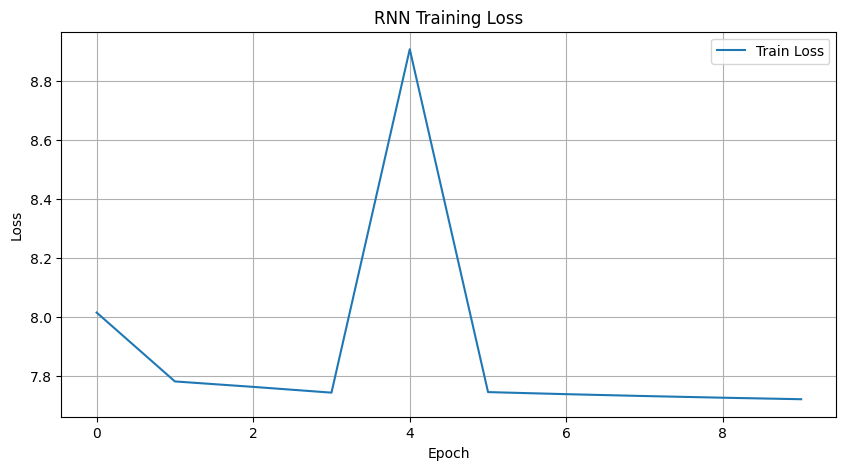

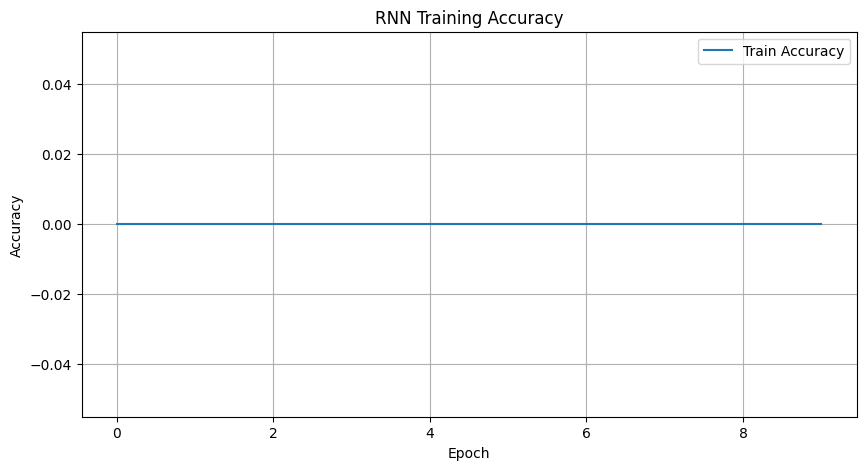

In [ ]:
import torch.optim as optim

# Have to create sequences

def rnn_sequence(embed):
    embed = embed.flatten()
    seq = embed.unsqueeze(1).unsqueeze(1)
    return seq

# Getting the inputs for RNN from the feature_dicts that we made above

rnn_inputs = {}
for pill_name, embed_tensor in features_dict.items():
    rnn_inputs[pill_name] = rnn_sequence(embed_tensor)

# This is the RNN!

rnn = nn.RNN(input_size=1,
             hidden_size=256,
             num_layers=2,
             nonlinearity='relu',
             bidirectional=True).to(device)

# Getting all of the distinct pill names from the rnn inputs (pills in feature dicts)
# So we know the number of classes

pill_names = list(rnn_inputs.keys())
num_classes = len(pill_names)

# We need this to be linear

fc = nn.Linear(256*2, num_classes).to(device)

# We did it this way instead of using the LabelEncoder like we did for the scratch ResNet18
# Since we can easily grab it from the features dict we made

pill_to_idx = {name: i for i, name in enumerate(pill_names)}

# Getting loss and optimizing

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(list(rnn.parameters()) + list(fc.parameters()), lr=1e-3)

# This is similar to the training we did for the scratch ResNet18, with
# a few adjustments

def train_one_epoch(rnn, fc, rnn_inputs, optimizer, criterion):
    rnn.train()
    fc.train()
    total_loss = 0
    correct = 0
    total = 0

    # Labeling

    for pill_name, seq_features in rnn_inputs.items():
        seq_features = seq_features.to(device)
        label_idx = torch.tensor([pill_to_idx[pill_name]], device=device)

        optimizer.zero_grad()
        rnn_out, hidden = rnn(seq_features)

        forward = hidden[-2, :, :]
        backward = hidden[-1, :, :]
        rnn_vector = torch.cat([forward, backward], dim=1)

        logits = fc(rnn_vector)
        loss = criterion(logits, label_idx)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted_idx = torch.argmax(logits, dim=1).item()
        if predicted_idx == label_idx.item():
            correct += 1
        total += 1

    return total_loss / total, correct / total

# The evaluate function like the one in the from scratch ResNet18!

def evaluate(rnn, fc, rnn_inputs, criterion):
    rnn.eval()
    fc.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for pill_name, seq_features in rnn_inputs.items():
            seq_features = seq_features.to(device)
            label_idx = torch.tensor([pill_to_idx[pill_name]], device=device)

            rnn_out, hidden = rnn(seq_features)
            forward = hidden[-2, :, :]
            backward = hidden[-1, :, :]
            rnn_vector = torch.cat([forward, backward], dim=1)

            logits = fc(rnn_vector)
            loss = criterion(logits, label_idx)

            total_loss += loss.item()
            predicted_idx = torch.argmax(logits, dim=1).item()
            if predicted_idx == label_idx.item():
                correct += 1
            total += 1

    return total_loss / total, correct / total

# Training loop just like the one in the from scratch ResNet18

train_losses, train_accuracies = [], []

for epoch in range(1, 11):
    train_loss, train_acc = train_one_epoch(rnn, fc, rnn_inputs, optimizer, criterion)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    print(f"Epoch {epoch:02d} | Loss: {train_loss:.4f} | Accuracy: {train_acc:.4f}")

# Plotting our training curves

plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.title('RNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.title('RNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

*Adding K-NN to the Pretrained ResNet18 Model*

In [ ]:
# Here we are adding K-NN to the Pretrained model

# The majority of this code is sourced from class as well as the D2L textbook

import numpy as np
from sklearn.neighbors import KNeighborsClassifier

pill_names = list(features_dict.keys())
X = []
y = []

for pill_name in pill_names:
    embed_tensor = features_dict[pill_name]
    flat_vec = embed_tensor.flatten().cpu().numpy()
    X.append(flat_vec)
    y.append(pill_name)

X = np.array(X)
y = np.array(y)


knn = KNeighborsClassifier(
    n_neighbors=5,
    metric="cosine"
)

knn.fit(X, y)

# Actually predicting the pill

def predict_pill(img_tensor):
    model.eval()
    with torch.no_grad():
        feats = model(img_tensor.unsqueeze(0).to(device))
        feats = feats.flatten().cpu().numpy()

    return knn.predict([feats])[0]

# We asked it to return the top 5 pill matches so that we had a greater
# range in case the first one was incorrect since these are difficult to predict

def retrieve_top_k(img_path, k=5):
    feats = extract_features(img_path).flatten().cpu().numpy()
    distances, indices = knn.kneighbors([feats], n_neighbors=k)
    return y[indices[0]]

# Predicting on the training data and getting the accuracy

preds = knn.predict(X)
accuracy = np.mean(preds == y)
print("Training accuracy:", accuracy)

# Grabbing the top 5 for an example pill (Loperamide Hydrochloride 2 MG Oral Capsule)

retrieve_top_k(r"/content/drive/MyDrive/600/00093-0311-01_NLMIMAGE10_6315B1FD.jpg", k=5)



Training accuracy: 0.19223484848484848


array(['Loperamide Hydrochloride 2 MG Oral Capsule',
       'Doxycycline Monohydrate 100 MG Oral Capsule [Monodox]',
       'fenofibric acid 45 MG Delayed Release Oral Capsule [Trilipix]',
       'Tretinoin 10 MG Oral Capsule',
       'fenofibric acid 45 MG Delayed Release Oral Capsule'],
      dtype='<U363')

In [ ]:
# We wanted to look at the accuracy metric as a way to initially identify how well
# This model performed

# Essentially just went throgh and predicted each with knn
# Got the true names and evaluated accuracy

def evaluate_knn(knn, test_loader, label_encoder):
    correct = 0
    total = 0

    for imgs, labels in test_loader:
        imgs = imgs.to(device)

        with torch.no_grad():
            feats = feature_model(imgs)
            feats = feats.cpu().numpy()

        preds = knn.predict(feats)

        true_names = label_encoder.inverse_transform(labels.numpy())

        correct += np.sum(preds == true_names)
        total += len(true_names)

    return correct / total

# We ran this on our test accuracy since we did training accuracy above

knn_test_acc = evaluate_knn(knn, test_loader, le)
print("KNN Test Accuracy:", knn_test_acc)

KNN Test Accuracy: 0.10075187969924812


In [ ]:
# After seeing accuracy, we wanted to evaluate recall@1, recall@5, recall@10, as
# well as MRR at 1, 5, and 10 and the time the model took to run
# (These metrics were suggested by Professor Shakeri)

# Very similar to what we did above, we basically just created a function
# to loop through and calculate the important metrics

def evaluate_knn_metrics(knn, test_loader, label_encoder, topk_list=[1,5,10]):
    recall_totals = {k: 0 for k in topk_list}
    mrr_totals = {k: 0 for k in topk_list}
    total_images = 0
    times = []

    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        labels = labels.numpy()
        true_names = label_encoder.inverse_transform(labels)

        with torch.no_grad():
            start_time = time.time()
            feats = feature_model(imgs).cpu().numpy()
            end_time = time.time()

        times.append((end_time - start_time) / len(imgs))

        for k in topk_list:
            distances, indices = knn.kneighbors(feats, n_neighbors=k)
            topk_preds = np.array(y)[indices]

            for i in range(len(true_names)):
                total_images += 1

                recall_totals[k] += 1 if true_names[i] in topk_preds[i] else 0

                if true_names[i] in topk_preds[i]:
                    rank = np.where(topk_preds[i] == true_names[i])[0][0] + 1
                    mrr_totals[k] += 1 / rank
                else:
                    mrr_totals[k] += 0

    avg_recall = {k: recall_totals[k] / total_images for k in topk_list}
    avg_mrr = {k: mrr_totals[k] / total_images for k in topk_list}
    avg_time = np.mean(times)

    return avg_recall, avg_mrr, avg_time

In [ ]:
# Running the metrics on the test data!

recalls, mrrs, avg_time = evaluate_knn_metrics(knn, test_loader, le, topk_list)

for k in topk_list:
    print(f"Recall@{k}: {recalls[k]:.4f}, MRR@{k}: {mrrs[k]:.4f}")
print(f"Average inference time per image: {avg_time:.4f} seconds")

Recall@1: 0.1684, MRR@1: 0.1684
Recall@5: 0.1865, MRR@5: 0.1750
Recall@10: 0.1985, MRR@10: 0.1766
Average inference time per image: 0.0021 seconds


In [ ]:
# We also wanted to see how the model performed with real world images.
# We found some images and their associated labels, then write this function to
# evaluate them with the ResNet18 + KNN model and get the top 5 matches

# None of these matched correctly unfortunately

In [ ]:
# Real World Image 1

retrieve_top_k("/content/drive/MyDrive/Amoxicillin 200 MG Clavulanate 28.5 MG Chewable Tablet.JPG")

array(['Amoxicillin 200 MG / Clavulanate 28.5 MG Chewable Tablet',
       'Hydrochlorothiazide 12.5 MG / telmisartan 80 MG Oral Tablet [Micardis-HCT]',
       'Pravastatin Sodium 80 MG Oral Tablet',
       'Hydrochlorothiazide 12.5 MG / telmisartan 40 MG Oral Tablet',
       'Carbidopa 25 MG / Levodopa 100 MG Extended Release Oral Tablet'],
      dtype='<U363')

In [ ]:
# Real World Image 2

retrieve_top_k("/content/drive/MyDrive/Bethanechol Chlorine 10 mg Tablet.jpg")


array(['Griseofulvin 500 MG Oral Tablet [Grifulvin V]',
       'cortisone acetate 25 MG Oral Tablet',
       'Metformin hydrochloride 500 MG Oral Tablet [Glucophage]',
       'Acetazolamide 250 MG Oral Tablet',
       'Ciprofloxacin 250 MG Oral Tablet [Cipro]'], dtype='<U363')

In [ ]:
# Real World Image 3

retrieve_top_k("/content/drive/MyDrive/ferrous sulfate 325 MG Oral Tablet.jpg")


array(['fluvastatin 20 MG Oral Capsule [Lescol]',
       'Hydrochlorothiazide 25 MG / Triamterene 37.5 MG Oral Capsule [Dyazide]',
       'Aspirin 25 MG / Dipyridamole 200 MG Oral Capsule',
       'pregabalin 300 MG Oral Capsule [Lyrica]',
       'Hydroxyzine Pamoate 50 MG Oral Capsule'], dtype='<U363')

In [ ]:
# Real World Image 4

retrieve_top_k("/content/drive/MyDrive/folic acid 1 MG Oral Tablet.jpg")

array(['duloxetine 20 MG Delayed Release Oral Capsule',
       'duloxetine 20 MG Delayed Release Oral Capsule [Cymbalta]',
       'Oseltamivir 30 MG Oral Capsule [Tamiflu]',
       'fenofibric acid 45 MG Delayed Release Oral Capsule [Trilipix]',
       '24 HR Methylphenidate Hydrochloride 30 MG Extended Release Oral Capsule'],
      dtype='<U363')

In [ ]:
# Real World Image 5

retrieve_top_k("/content/drive/MyDrive/Prazosin 2 MG Oral Capsule.jpg")

array(['Didanosine 200 MG Delayed Release Oral Capsule',
       'NITROFURANTOIN, MACROCRYSTALS 25 MG / Nitrofurantoin, Monohydrate 75 MG Oral Capsule',
       '24 HR phendimetrazine tartrate 105 MG Extended Release Oral Capsule',
       'Prazosin 2 MG Oral Capsule',
       'Doxycycline Monohydrate 100 MG Oral Capsule [Monodox]'],
      dtype='<U363')

### Error Analysis

In [ ]:
# Part of the projetc was to perform an error analysis
# To do this we essentially showed the true label, predicted label, and the top 5 labels returned

# If the predicted label was incorrect for the true label, it was counted as an error

# We printed the length of our errors and results

# 598 errors out of 665 results, so only 67 were correct

def get_knn_predictions(knn, test_loader, label_encoder, k=5):
    results = []

    for imgs, labels in test_loader:
        imgs = imgs.to(device)

        with torch.no_grad():
            feats = feature_model(imgs).cpu().numpy()

        top1_preds = knn.predict(feats)

        distances, indices = knn.kneighbors(feats, n_neighbors=k)
        topk_preds = y[indices]

        true_names = label_encoder.inverse_transform(labels.numpy())

        for i in range(len(true_names)):
            results.append({
                "true": true_names[i],
                "top1": top1_preds[i],
                "topk": topk_preds[i].tolist(),
            })

    return results

results = get_knn_predictions(knn, test_loader, le, k=5)

errors = [r for r in results if r["true"] != r["top1"]]
len(errors), len(results)

(598, 665)

In [ ]:
# Printing out ten examples of our error analysis

for r in errors[:10]:
    print("TRUE:", r["true"])
    print("PRED:", r["top1"])
    print("TOP-5:", r["topk"])
    print("---")

TRUE: Loperamide Hydrochloride 2 MG Oral Capsule
PRED: Doxycycline Monohydrate 100 MG Oral Capsule [Monodox]
TOP-5: ['Loperamide Hydrochloride 2 MG Oral Capsule', 'Doxycycline Monohydrate 100 MG Oral Capsule [Monodox]', 'fenofibric acid 45 MG Delayed Release Oral Capsule [Trilipix]', 'Tretinoin 10 MG Oral Capsule', 'fenofibric acid 45 MG Delayed Release Oral Capsule']
---
TRUE: Hydroxyzine Pamoate 25 MG Oral Capsule
PRED: 12 HR Carbamazepine 100 MG Extended Release Oral Capsule
TOP-5: ['Hydroxyzine Pamoate 25 MG Oral Capsule', '24 HR Verapamil hydrochloride 180 MG Extended Release Oral Capsule', '12 HR Carbamazepine 100 MG Extended Release Oral Capsule', 'zaleplon 10 MG Oral Capsule', 'Temazepam 15 MG Oral Capsule']
---
TRUE: Fluoxetine 10 MG Oral Capsule
PRED: Fenofibrate 150 MG Oral Capsule
TOP-5: ['Fenofibrate 150 MG Oral Capsule [Lipofen]', 'Fenofibrate 150 MG Oral Capsule', 'Oxazepam 15 MG Oral Capsule', 'silodosin 8 MG Oral Capsule [Rapaflo]', 'Fluoxetine 20 MG Oral Capsule [Proz

In [ ]:
from collections import Counter

# Counting the number of true errors and seeing the most common pills that were errored on

true_error_counts = Counter([e["true"] for e in errors])
true_error_counts.most_common(20)

[(nan, 10),
 ('atorvastatin 20 MG Oral Tablet', 4),
 ('Simvastatin 5 MG Oral Tablet', 4),
 ('{6 (Ethinyl Estradiol 0.03 MG / Levonorgestrel 0.05 MG Oral Tablet) / 10 (Ethinyl Estradiol 0.03 MG / Levonorgestrel 0.125 MG Oral Tablet) / 5 (Ethinyl Estradiol 0.04 MG / Levonorgestrel 0.075 MG Oral Tablet) / 7 (Inert Ingredients 1 MG Oral Tablet) } Pack [Enpresse 28 Day]',
  4),
 ('{7 (Desogestrel 0.1 MG / Ethinyl Estradiol 0.025 MG Oral Tablet) / 7 (Desogestrel 0.125 MG / Ethinyl Estradiol 0.025 MG Oral Tablet) / 7 (Desogestrel 0.15 MG / Ethinyl Estradiol 0.025 MG Oral Tablet) / 7 (Inert Ingredients 1 MG Oral Tablet) } Pack [Velivet 28 Day]',
  4),
 ('{7 (Ethinyl Estradiol 0.025 MG / norgestimate 0.18 MG Oral Tablet) / 7 (Ethinyl Estradiol 0.025 MG / norgestimate 0.215 MG Oral Tablet) / 7 (Ethinyl Estradiol 0.025 MG / norgestimate 0.25 MG Oral Tablet) / 7 (Inert Ingredients 1 MG Oral Tablet) } Pack [Ortho Tri-Cyclen Lo 28 Day]',
  4),
 ('Amlodipine 10 MG / Benazepril hydrochloride 40 MG Ora

In [ ]:
confusions = Counter([(e["true"], e["top1"]) for e in errors])
confusions.most_common(20)

[(('Loperamide Hydrochloride 2 MG Oral Capsule',
   np.str_('Doxycycline Monohydrate 100 MG Oral Capsule [Monodox]')),
  2),
 (('Cephalexin 250 MG Oral Capsule',
   np.str_('Amlodipine 10 MG / Benazepril hydrochloride 20 MG Oral Capsule')),
  2),
 (('Indomethacin 50 MG Oral Capsule',
   np.str_('12 HR Carbamazepine 100 MG Extended Release Oral Capsule')),
  2),
 (('Warfarin Sodium 3 MG Oral Tablet',
   np.str_('Carbidopa 25 MG / Levodopa 100 MG Extended Release Oral Tablet')),
  2),
 (('Pravastatin Sodium 80 MG Oral Tablet',
   np.str_('24 HR Levetiracetam 500 MG Extended Release Oral Tablet')),
  2),
 (('atorvastatin 20 MG Oral Tablet',
   np.str_('Ciprofloxacin 100 MG Oral Tablet')),
  2),
 (('Famotidine 20 MG Oral Tablet',
   np.str_('Doxycycline Monohydrate 100 MG Oral Tablet')),
  2),
 (('Lovastatin 20 MG Oral Tablet',
   np.str_('24 HR Guanfacine 3 MG Extended Release Oral Tablet')),
  2),
 (('Promethazine Hydrochloride 50 MG Oral Tablet',
   np.str_('24 HR Alprazolam 0.5 MG Exte

In [ ]:
# Printing out more errors

for e in errors[:10]:
    print("TRUE:", e["true"])
    print("TOP-5 NEIGHBORS:")
    for p in e["topk"]:
        print("   ", p)
    print()

TRUE: Loperamide Hydrochloride 2 MG Oral Capsule
TOP-5 NEIGHBORS:
    Loperamide Hydrochloride 2 MG Oral Capsule
    Doxycycline Monohydrate 100 MG Oral Capsule [Monodox]
    fenofibric acid 45 MG Delayed Release Oral Capsule [Trilipix]
    Tretinoin 10 MG Oral Capsule
    fenofibric acid 45 MG Delayed Release Oral Capsule

TRUE: Hydroxyzine Pamoate 25 MG Oral Capsule
TOP-5 NEIGHBORS:
    Hydroxyzine Pamoate 25 MG Oral Capsule
    24 HR Verapamil hydrochloride 180 MG Extended Release Oral Capsule
    12 HR Carbamazepine 100 MG Extended Release Oral Capsule
    zaleplon 10 MG Oral Capsule
    Temazepam 15 MG Oral Capsule

TRUE: Fluoxetine 10 MG Oral Capsule
TOP-5 NEIGHBORS:
    Fenofibrate 150 MG Oral Capsule [Lipofen]
    Fenofibrate 150 MG Oral Capsule
    Oxazepam 15 MG Oral Capsule
    silodosin 8 MG Oral Capsule [Rapaflo]
    Fluoxetine 20 MG Oral Capsule [Prozac]

TRUE: nan
TOP-5 NEIGHBORS:
    Flurazepam Hydrochloride 30 MG Oral Capsule
    Terazosin 10 MG Oral Capsule
    Doxepi

In [ ]:
import pandas as pd

# Creating a dataframe of the most commonly confused pills so that we can create a confusion matrix/heatmap

conf_df = pd.DataFrame(confusions.most_common(), columns=["pair", "count"])
conf_df.to_csv("confusion_pairs.csv")


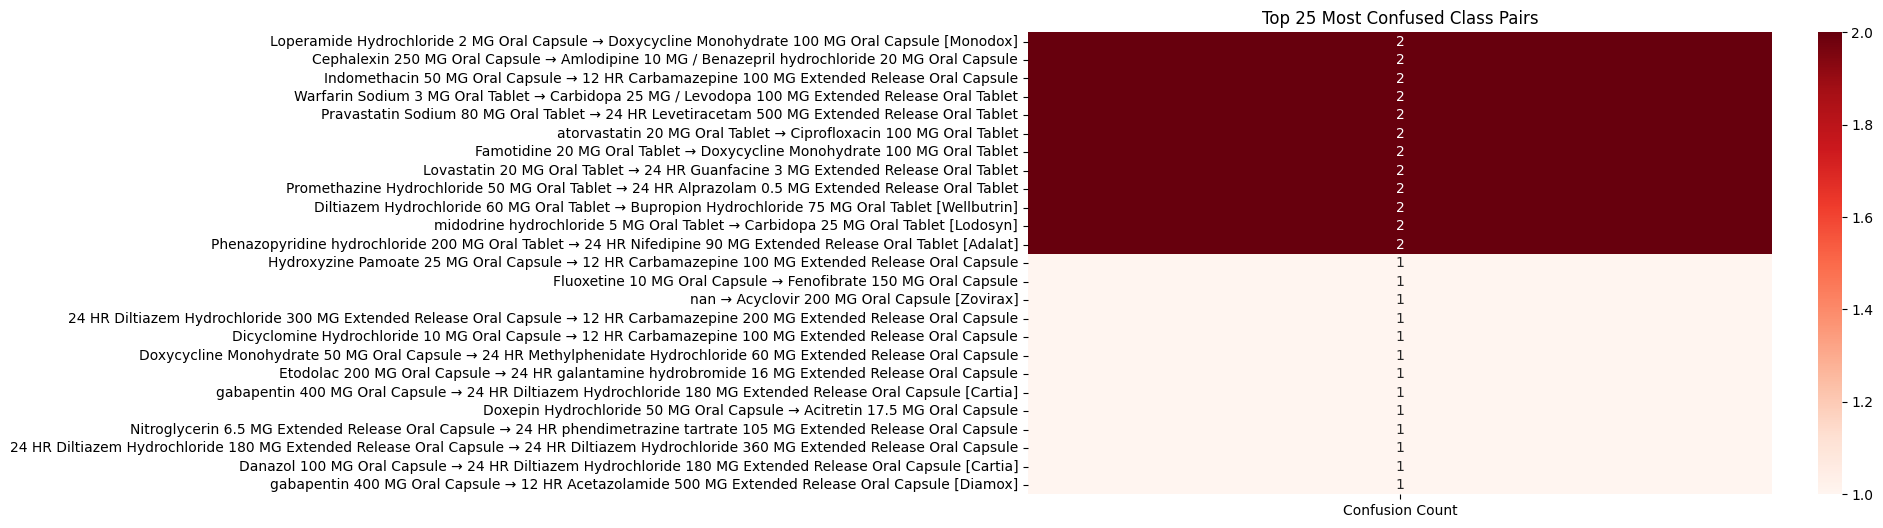

In [ ]:
import numpy as np
import seaborn as sns

# Creating a heatmap showing confused class pairs as well as a list of the 25 most confused pairs

confusions = Counter([(e["true"], e["top1"]) for e in errors])

top_pairs = confusions.most_common(25)
true_labels = [p[0][0] for p in top_pairs]
pred_labels = [p[0][1] for p in top_pairs]
values = [p[1] for p in top_pairs]

plt.figure(figsize=(12,6))
sns.heatmap(
    np.array(values).reshape(-1,1),
    annot=True,
    yticklabels=[f"{t} → {p}" for t,p in zip(true_labels,pred_labels)],
    xticklabels=["Confusion Count"],
    cmap="Reds"
)
plt.title("Top 25 Most Confused Class Pairs")
plt.show()

**Ablation Study 1: Comparing Scratch Resnet18 to Pretrained Resnet18**

In [ ]:
# defining scratch resnet18 model like above

scratch_model = ResNet18(num_classes=num_classes, return_features=False)
scratch_model = scratch_model.to(device)

# defining scratch resnet18 optimizer like above

scratch_optimizer = optim.Adam(scratch_model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()


# pretrained resenet model using imagenet like above

pretrained_model = models.resnet18(weights="IMAGENET1K_V1")
pretrained_model.fc = nn.Linear(512, num_classes)
pretrained_model = pretrained_model.to(device)

# defining pretrained resnet optimizer

pretrained_optimizer = optim.Adam(pretrained_model.parameters(), lr=1e-4)


In [ ]:
# defining top 1 and top 5 pills

def accuracy_topk(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    results = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0)
        results.append((correct_k / batch_size).item())
    return results

# same train function with top 1 and top 5 validation accuracies reported

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_top1, total_top5, total_samples = 0, 0, 0

    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        out = model(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()

        top1, top5 = accuracy_topk(out, labels, topk=(1, 5))
        batch_size = labels.size(0)
        total_top1 += top1 * batch_size
        total_top5 += top5 * batch_size
        total_samples += batch_size

    return total_top1 / total_samples, total_top5 / total_samples

# same evaluate function with top 1 and top 5 validation accuracies reported

def evaluate(model, loader, device):
    model.eval()
    total_top1, total_top5, total_samples = 0, 0, 0

    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            out = model(imgs)

            top1, top5 = accuracy_topk(out, labels, topk=(1, 5))
            batch_size = labels.size(0)
            total_top1 += top1 * batch_size
            total_top5 += top5 * batch_size
            total_samples += batch_size

    return total_top1 / total_samples, total_top5 / total_samples


In [ ]:
# Using 10 epochs since this is consistent with what we have been doing

epochs = 10

# Training the From Scratch ResNet18 model

scratch_results = []

print("=== Training FROM-SCRATCH ResNet18 ===")
for epoch in range(1,epochs+1):
    train_top1, train_top5 = train_one_epoch(scratch_model, train_loader, scratch_optimizer, criterion, device)
    val_top1, val_top5 = evaluate(scratch_model, val_loader, device)
    scratch_results.append((val_top1, val_top5))
    print(f"[Scratch][Epoch {epoch:02d}] Val Top-1: {val_top1:.4f}, Top-5: {val_top5:.4f}")



=== Training FROM-SCRATCH ResNet18 ===
[Scratch][Epoch 01] Val Top-1: 0.0107, Top-5: 0.0228
[Scratch][Epoch 02] Val Top-1: 0.0076, Top-5: 0.0183
[Scratch][Epoch 03] Val Top-1: 0.0076, Top-5: 0.0274
[Scratch][Epoch 04] Val Top-1: 0.0091, Top-5: 0.0350
[Scratch][Epoch 05] Val Top-1: 0.0107, Top-5: 0.0335
[Scratch][Epoch 06] Val Top-1: 0.0091, Top-5: 0.0411
[Scratch][Epoch 07] Val Top-1: 0.0152, Top-5: 0.0396
[Scratch][Epoch 08] Val Top-1: 0.0198, Top-5: 0.0502
[Scratch][Epoch 09] Val Top-1: 0.0213, Top-5: 0.0624
[Scratch][Epoch 10] Val Top-1: 0.0213, Top-5: 0.0700


In [ ]:
# Using 10 epochs since this is consistent with what we have been doing
epochs = 10

# Training the Pretrained ResNet18 model

pretrained_results = []
print("\n=== Training PRETRAINED ResNet18 ===")
for epoch in range(1,epochs+1):
    train_top1, train_top5 = train_one_epoch(pretrained_model, train_loader, pretrained_optimizer, criterion, device)
    val_top1, val_top5 = evaluate(pretrained_model, val_loader, device)
    pretrained_results.append((val_top1, val_top5))
    print(f"[Pretrained][Epoch {epoch:02d}] Val Top-1: {val_top1:.4f}, Top-5: {val_top5:.4f}")


=== Training PRETRAINED ResNet18 ===
[Pretrained][Epoch 01] Val Top-1: 0.0107, Top-5: 0.0167
[Pretrained][Epoch 02] Val Top-1: 0.0122, Top-5: 0.0335
[Pretrained][Epoch 03] Val Top-1: 0.0152, Top-5: 0.0518
[Pretrained][Epoch 04] Val Top-1: 0.0289, Top-5: 0.0822
[Pretrained][Epoch 05] Val Top-1: 0.0320, Top-5: 0.1005
[Pretrained][Epoch 06] Val Top-1: 0.0533, Top-5: 0.1218
[Pretrained][Epoch 07] Val Top-1: 0.0502, Top-5: 0.1248
[Pretrained][Epoch 08] Val Top-1: 0.0594, Top-5: 0.1400
[Pretrained][Epoch 09] Val Top-1: 0.0609, Top-5: 0.1476
[Pretrained][Epoch 10] Val Top-1: 0.0670, Top-5: 0.1583


As seen above, the pretrained ResNet18 model performed better as it was trained on the imagenet data compared to the from scratch ResNet18 model. The pretrained model is able to understand edges, shapes, colors, etc prior to even seeing the pill data as it was pretrained, giving it an advantage and allowing it to grow accuracy to identify both top 1 and top 5 pills accurately. Overall, the accuracy is still low, but in future work, more pill images per class can be included to help with this. Also, the models can be trained for more epochs.

**Ablation Study 2: Pretrained Resnet18 vs pretrained Resnet18 + KNN classifier**

*Pretrained Resnet18: Recall calculated in code above as well and shown below*

In [ ]:
# These are the pretrained Resenet18 metrics

print("Softmax Recall@1:", soft_r1)
print("Softmax Recall@5:", soft_r5)

Softmax Recall@1: 0.05714285714285714
Softmax Recall@5: 0.14887218045112782


*Pretrained Resnet 18 + KNN: Calculated in code above as well and shown below*

In [ ]:
# These are the pretrained Resnet18 + KNN metrics

avg_recall, avg_mrr, avg_time = evaluate_knn_metrics(knn, test_loader, le, topk_list=[1,5,10])
print("Recall:", avg_recall)
print("MRR:", avg_mrr)
print("Avg inference time per image:", avg_time)

Recall: {1: 0.16842105263157894, 5: 0.18646616541353384, 10: 0.19849624060150375}
MRR: {1: np.float64(0.16842105263157894), 5: np.float64(0.17499582289055973), 10: np.float64(0.17657437243903407)}
Avg inference time per image: 0.0020628801839692253
